<a href="https://colab.research.google.com/github/cybermin/2022_BSSM/blob/main/02_pandas_basic_%ED%95%B4%EA%B2%B0%EB%AC%B8%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


---

# **해결문제**


RFID기반 음식물쓰레기 종량제 시스템을 채택한 지자체의  2017년7월~2020년7월까지의 지자체별 RFID음식물쓰레기 배출량를 분석하시오.

+ 광역시도별 음식물 쓰레기 배출량
+ 광역시도별 자료건수
+ 부산광역시 지지체별 음식물 쓰레기 배출량
+ 해운대구 월별 음식물 쓰레기 배출량


---

In [ ]:
#한글 폰트 사용설치
%config InlineBackend.figure_format = 'retina'

!apt -qq -y install fonts-nanum

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

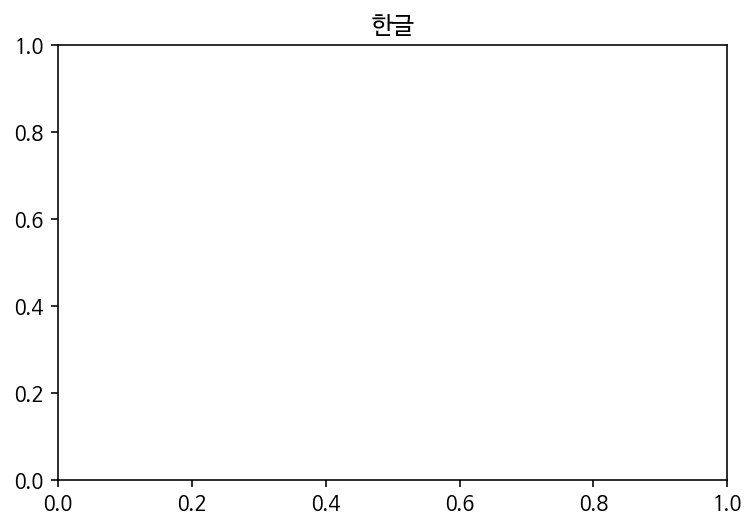

In [ ]:
plt.title('한글')
plt.show()

## 1. 데이터불러오기



In [ ]:
#pandas 라이브러리 추가
import pandas as pd

In [ ]:
#데이터불러오기
df = pd.read_csv('/content/drive/MyDrive/BSSM/BSSM2022/data/지자체별 RFID음식물쓰레기 배출량.csv', engine='python', encoding='cp949' )

In [ ]:
#열명변경 : 배출연도->연도, 배출월->월, 배출량(톤)->배출량
 
df.columns = ['연도', '월', '광역시도', '기초지자체', '배출량']
df


,연도,월,광역시도,기초지자체,배출량
0,2017,7,서울특별시,종로구,87260
1,2017,7,서울특별시,중구,189784
2,2017,7,서울특별시,용산구,6679
3,2017,7,서울특별시,성동구,296140
4,2017,7,서울특별시,광진구,166759
...,...,...,...,...,...
5190,2020,7,경상남도,창녕군,169073
5191,2020,7,경상남도,고성군,39642
5192,2020,7,경상남도,하동군,10051
5193,2020,7,제주특별자치도,제주시,2202240


## 2. 광역시도별 배출량

In [ ]:
import seaborn as sns

Text(0.5, 1.0, '광역시별 배출량')

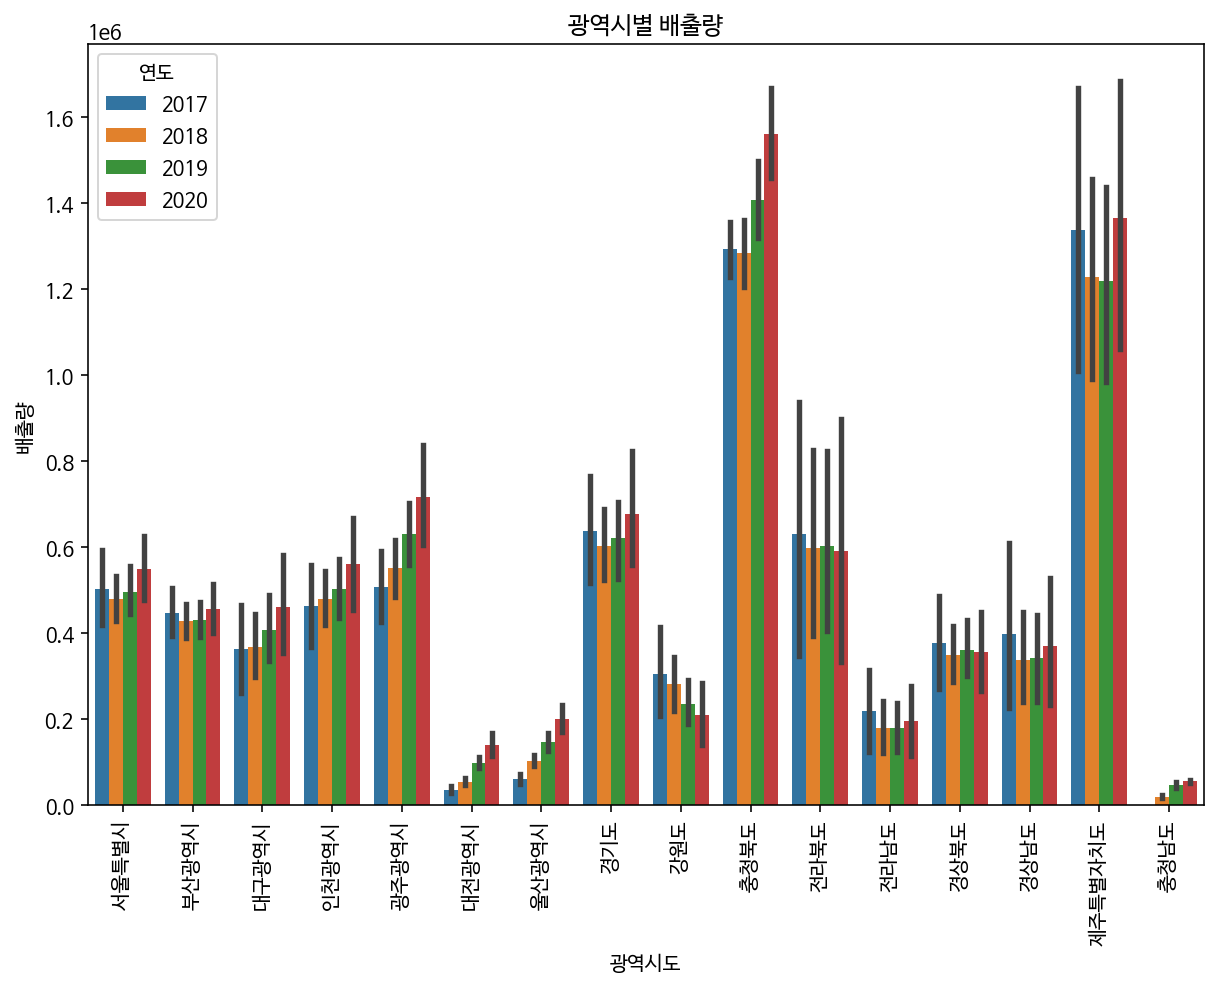

In [44]:
plt.figure(figsize=(10,7))
sns.barplot(x='광역시도', y='배출량', hue='연도', data=df)
plt.xticks(rotation=90)
plt.title('광역시별 배출량')

## 3.광역시도별 자료 건수

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

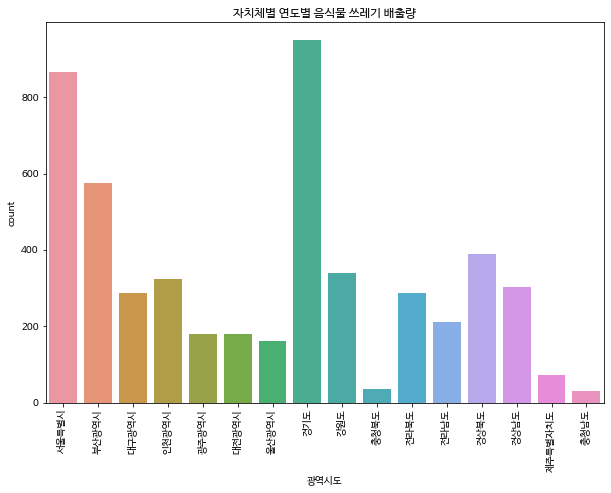

In [ ]:
plt.figure(figsize=(10,7))
sns.countplot(x='광역시도', data=df)
plt.title('자치체별 연도별 음식물 쓰레기 배출량')
plt.xticks(rotation=90)

## 4.부산광역시 지자체별 음식물 쓰레기 배출량

In [ ]:
 df.loc[22:,'연도':'배출량']

,연도,월,광역시도,기초지자체,배출량
22,2017,7,부산광역시,중구,9596
23,2017,7,부산광역시,서구,97104
24,2017,7,부산광역시,동구,59401
25,2017,7,부산광역시,영도구,187073
26,2017,7,부산광역시,부산진구,708005
...,...,...,...,...,...
5190,2020,7,경상남도,창녕군,169073
5191,2020,7,경상남도,고성군,39642
5192,2020,7,경상남도,하동군,10051
5193,2020,7,제주특별자치도,제주시,2202240


In [ ]:
busan = df[df['광역시도'] == '부산광역시']
busan

,연도,월,광역시도,기초지자체,배출량
22,2017,7,부산광역시,중구,9596
23,2017,7,부산광역시,서구,97104
24,2017,7,부산광역시,동구,59401
25,2017,7,부산광역시,영도구,187073
26,2017,7,부산광역시,부산진구,708005
...,...,...,...,...,...
5078,2020,7,부산광역시,강서구,428097
5079,2020,7,부산광역시,연제구,474435
5080,2020,7,부산광역시,수영구,335382
5081,2020,7,부산광역시,사상구,626469


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

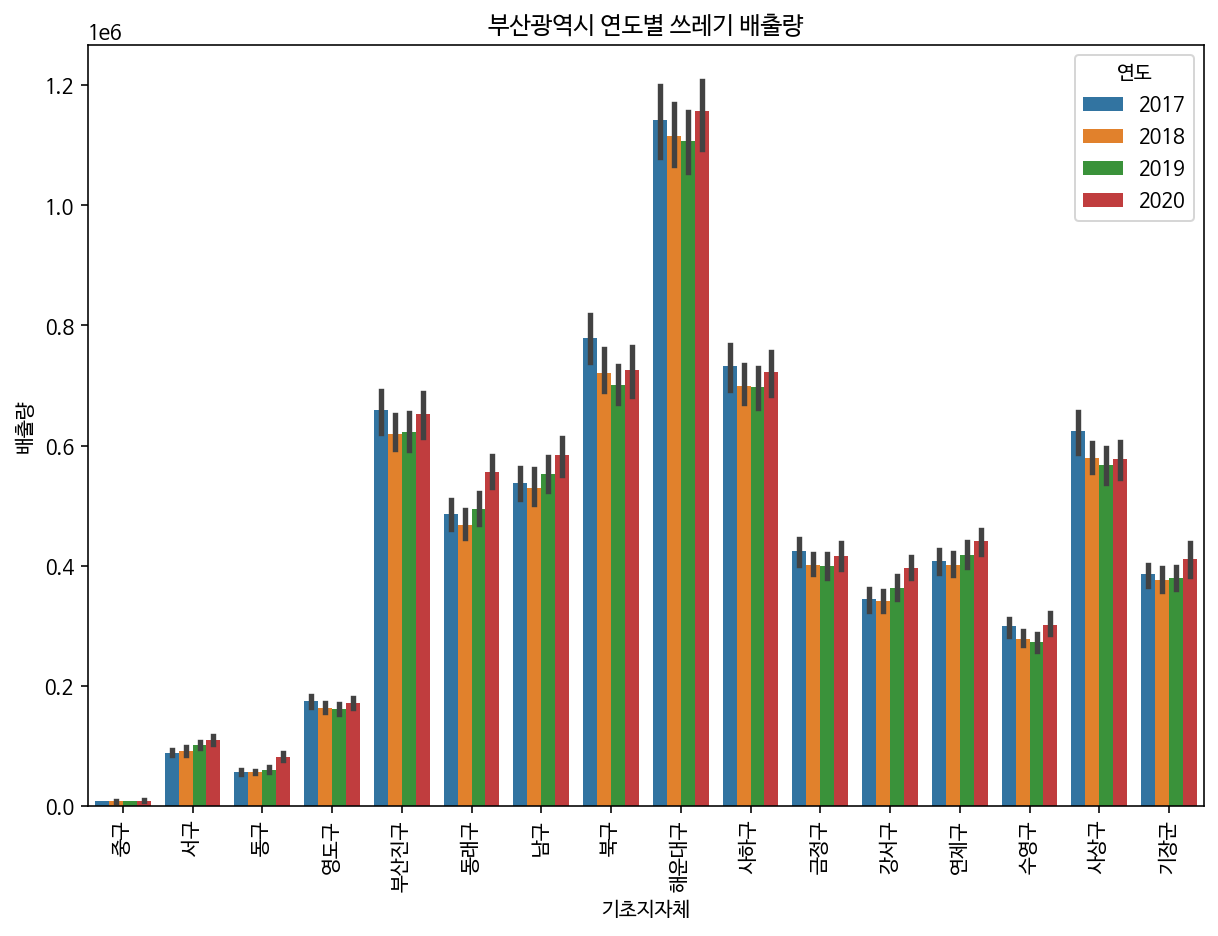

In [ ]:
plt.figure(figsize=(10,7))
sns.barplot(x='기초지자체', y='배출량', hue='연도', data=busan)
plt.title('부산광역시 연도별 쓰레기 배출량')
plt.xticks(rotation=90)

In [ ]:
hae = busan[busan['기초지자체'] == '해운대구']
hae

,연도,월,광역시도,기초지자체,배출량
30,2017,7,부산광역시,해운대구,1248638
161,2017,8,부산광역시,해운대구,1136856
292,2017,9,부산광역시,해운대구,1010415
425,2017,10,부산광역시,해운대구,1175343
559,2017,11,부산광역시,해운대구,1092730
693,2017,12,부산광역시,해운대구,1186786
829,2018,1,부산광역시,해운대구,1065273
965,2018,2,부산광역시,해운대구,1025616
1101,2018,3,부산광역시,해운대구,1047523
1239,2018,4,부산광역시,해운대구,1000967


Text(0.5, 1.0, '해운대구 월별 음식물쓰레기 배출량')

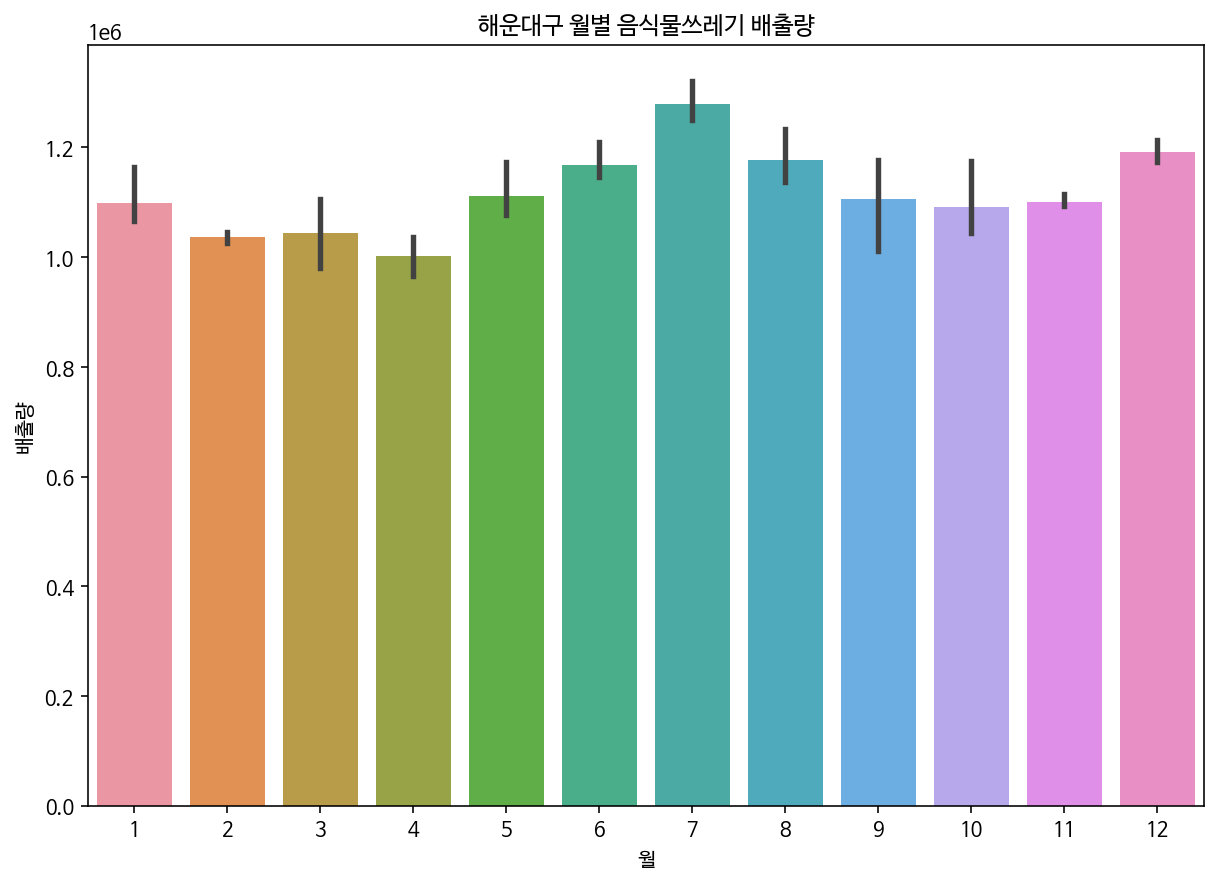

In [ ]:
plt.figure(figsize=(10,7))
sns.barplot(x='월', y='배출량', data=hae)
plt.title('해운대구 월별 음식물쓰레기 배출량')


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5195 entries, 0 to 5194
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   연도      5195 non-null   int64 
 1   월       5195 non-null   int64 
 2   광역시도    5195 non-null   object
 3   기초지자체   5195 non-null   object
 4   배출량     5195 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 203.1+ KB


In [75]:
df[df['광역시도'].isin(['부산광역시', '경상남도', '경상북도']) & (df['연도'] == 2019)]


,연도,월,광역시도,기초지자체,배출량
2519,2019,1,부산광역시,중구,7425
2520,2019,1,부산광역시,서구,94938
2521,2019,1,부산광역시,동구,53881
2522,2019,1,부산광역시,영도구,155276
2523,2019,1,부산광역시,부산진구,599766
...,...,...,...,...,...
4274,2019,12,경상남도,양산시,654587
4275,2019,12,경상남도,의령군,4918
4276,2019,12,경상남도,창녕군,152944
4277,2019,12,경상남도,고성군,32333
